In [1]:
# Loading the required libraries
library(ggplot2)
library(tidyverse)
library(dplyr)
library(corrplot)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter()  masks

In [2]:
# Reading the csv file
data = read.csv('HCL-INSYS.BO.csv')
head(data)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2016-05-16,40.002701,40.300488,39.357494,39.804176,39.804176,290899
2,2016-05-17,40.151592,40.995323,39.704914,40.399750,40.399750,419863
3,2016-05-18,40.052330,40.350117,39.804176,39.903439,39.903439,220391
4,2016-05-19,40.002701,42.285732,39.903439,40.896061,40.896061,693498
5,2016-05-20,40.896061,41.193848,39.556019,39.903439,39.903439,375344
6,2016-05-23,39.903439,40.350117,39.655281,39.853806,39.853806,239396


In [3]:
# Display the dimension of csv file
dim(data)

[1] 1234    7

In [4]:
# Details of the csv  
str(data)

'data.frame':	1234 obs. of  7 variables:
 $ Date     : Factor w/ 1234 levels "2016-05-16","2016-05-17",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open     : Factor w/ 839 levels "10.000000","10.100000",..: 283 286 284 283 296 273 286 271 262 250 ...
 $ High     : Factor w/ 877 levels "10.000000","10.090000",..: 293 306 294 325 312 294 290 301 271 264 ...
 $ Low      : Factor w/ 823 levels "10.140000","10.150000",..: 258 266 268 270 262 265 251 258 238 242 ...
 $ Close    : Factor w/ 861 levels "10.140000","10.160000",..: 272 292 274 301 274 273 266 288 255 249 ...
 $ Adj.Close: Factor w/ 861 levels "10.140000","10.160000",..: 272 292 274 301 274 273 266 288 255 249 ...
 $ Volume   : Factor w/ 1232 levels "0","100246","1004612",..: 481 692 338 1041 630 382 592 667 806 551 ...


In [5]:
# Choose cols 2 to 7 and convert factor type to numeric
i = c(2:7)
data[, i] = apply(data[, i], 2, function(x) as.numeric(as.character(x)))
                  

Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"

In [6]:
# Applying the above func to data
sapply(data, class)

Date      Open      High       Low     Close Adj.Close    Volume 
 "factor" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric"

In [7]:
# data after conversion
str(data)

'data.frame':	1234 obs. of  7 variables:
 $ Date     : Factor w/ 1234 levels "2016-05-16","2016-05-17",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open     : num  40 40.2 40.1 40 40.9 ...
 $ High     : num  40.3 41 40.4 42.3 41.2 ...
 $ Low      : num  39.4 39.7 39.8 39.9 39.6 ...
 $ Close    : num  39.8 40.4 39.9 40.9 39.9 ...
 $ Adj.Close: num  39.8 40.4 39.9 40.9 39.9 ...
 $ Volume   : num  290899 419863 220391 693498 375344 ...


In [8]:
# There are 2 Missing values in the all the cols of the dataFrame
# Hence removing those 2 rows in all the cols
data = na.omit(data)

In [9]:
# Creating a new dataframe called newData from previous dataframe (Data)
# Here we drop the Date col
newData = data %>% select(Open, High, Low, Close, Adj.Close, Volume)

In [10]:
# Structure of our new dataFrame
str(newData)

'data.frame':	1232 obs. of  6 variables:
 $ Open     : num  40 40.2 40.1 40 40.9 ...
 $ High     : num  40.3 41 40.4 42.3 41.2 ...
 $ Low      : num  39.4 39.7 39.8 39.9 39.6 ...
 $ Close    : num  39.8 40.4 39.9 40.9 39.9 ...
 $ Adj.Close: num  39.8 40.4 39.9 40.9 39.9 ...
 $ Volume   : num  290899 419863 220391 693498 375344 ...


In [11]:
head(newData, n = 10)

,Open,High,Low,Close,Adj.Close,Volume
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,40.00270,40.30049,39.35749,39.80418,39.80418,290899
2,40.15159,40.99532,39.70491,40.39975,40.39975,419863
3,40.05233,40.35012,39.80418,39.90344,39.90344,220391
4,40.00270,42.28573,39.90344,40.89606,40.89606,693498
5,40.89606,41.19385,39.55602,39.90344,39.90344,375344
6,39.90344,40.35012,39.65528,39.85381,39.85381,239396
7,40.15159,40.15159,38.81155,39.45676,39.45676,352436
8,39.80418,40.74717,39.35749,40.20123,40.20123,398211
9,39.20860,39.40713,37.81893,38.71229,38.71229,482505


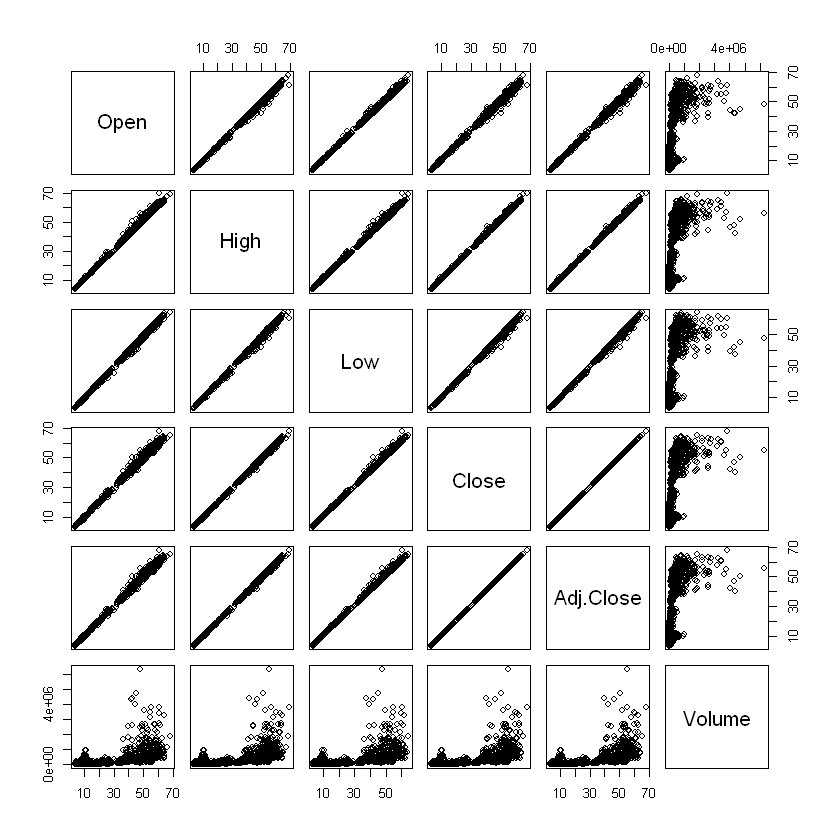

In [12]:
# Correlation of each Feature
pairs(newData)

All our features are linearly correlated, so let us look how the features are significant wrt to our response(Adj.Close) which is the Adjusted Close Price at the end of the day.

In [13]:
# Fit the data to a Linear Regression model
# Check for significance of Vloume wrt response
model = lm(data = newData, Adj.Close ~ Volume)
summary(model)


Call:
lm(formula = Adj.Close ~ Volume, data = newData)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.024 -14.812  -1.403  14.055  32.586 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.176e+01  5.481e-01   39.70   <2e-16 ***
Volume      1.926e-05  8.083e-07   23.82   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.09 on 1230 degrees of freedom
Multiple R-squared:  0.3158,	Adjusted R-squared:  0.3152 
F-statistic: 567.6 on 1 and 1230 DF,  p-value: < 2.2e-16


In [14]:
# Check for significance of Open wrt response
model = lm(data = newData, Adj.Close ~ Open)
summary(model)


Call:
lm(formula = Adj.Close ~ Open, data = newData)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9393 -0.4074 -0.0468  0.2727  8.3947 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.037174   0.053380  -0.696    0.486    
Open         0.996013   0.001525 652.987   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.043 on 1230 degrees of freedom
Multiple R-squared:  0.9971,	Adjusted R-squared:  0.9971 
F-statistic: 4.264e+05 on 1 and 1230 DF,  p-value: < 2.2e-16


In [15]:
# Check for significance of High wrt response
model = lm(data = newData, Adj.Close ~ High)
summary(model)


Call:
lm(formula = Adj.Close ~ High, data = newData)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8407 -0.1791  0.0691  0.2629  1.2903 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.0438637  0.0270155   -1.624    0.105    
High         0.9752807  0.0007555 1290.881   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5284 on 1230 degrees of freedom
Multiple R-squared:  0.9993,	Adjusted R-squared:  0.9993 
F-statistic: 1.666e+06 on 1 and 1230 DF,  p-value: < 2.2e-16


In [16]:
# Check for significance of Low wrt response
model = lm(data = newData, Adj.Close ~ Low)
summary(model)


Call:
lm(formula = Adj.Close ~ Low, data = newData)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8749 -0.3420 -0.1334  0.0906  7.6037 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.078428   0.037107   2.114   0.0348 *  
Low         1.015585   0.001084 936.983   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7277 on 1230 degrees of freedom
Multiple R-squared:  0.9986,	Adjusted R-squared:  0.9986 
F-statistic: 8.779e+05 on 1 and 1230 DF,  p-value: < 2.2e-16


In [17]:
# Check for significance of Close wrt response
model = lm(data = newData, Adj.Close ~ Close)
summary(model)

Warning message in summary.lm(model):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = Adj.Close ~ Close, data = newData)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.275e-13 -2.390e-16  1.610e-16  4.600e-16  3.997e-15 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 6.478e-15  1.927e-16 3.361e+01   <2e-16 ***
Close       1.000e+00  5.532e-18 1.808e+17   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.774e-15 on 1230 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 3.268e+34 on 1 and 1230 DF,  p-value: < 2.2e-16


Expected as unreliable because Adjusted close price is put considering the market behaviour wrt features and Close price.
Hence we can neglect this feature.

In [18]:
# Check for significance of all features wrt response
model = lm(data = newData, Adj.Close ~ Open + High + Low + Volume)
summary(model)


Call:
lm(formula = Adj.Close ~ Open + High + Low + Volume, data = newData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51885 -0.15003 -0.00286  0.14879  1.75875 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.467e-02  1.761e-02   2.536   0.0113 *  
Open        -5.225e-01  1.622e-02 -32.215   <2e-16 ***
High         8.342e-01  1.783e-02  46.797   <2e-16 ***
Low          6.789e-01  1.778e-02  38.182   <2e-16 ***
Volume       3.245e-08  2.827e-08   1.148   0.2513    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3356 on 1227 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9997 
F-statistic: 1.033e+06 on 4 and 1227 DF,  p-value: < 2.2e-16


The model summary when we consider all the features tells us that our Adjusted Closing Price i.e, the price of the stock wrt market at the end of day is mainly considering Opening price, Lowest Price, Highest Price and the volume is not really significant. 
Keeping this wrt our data let us try to see the regression line and predict the price.

#### Fitting the Linear Regression Model for Multiple features

In [19]:
# Linear Regression Model with Predictors(OPen, High, Low)
# Response as Adjusted Closing Price(Adj.Close)
model = lm(data = newData, Adj.Close ~ Open + High + Low)
summary(model)


Call:
lm(formula = Adj.Close ~ Open + High + Low, data = newData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50013 -0.15263 -0.00253  0.14758  1.69485 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04074    0.01728   2.358   0.0185 *  
Open        -0.52808    0.01546 -34.152   <2e-16 ***
High         0.84856    0.01268  66.941   <2e-16 ***
Low          0.67016    0.01607  41.689   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3357 on 1228 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9997 
F-statistic: 1.377e+06 on 3 and 1228 DF,  p-value: < 2.2e-16


#### Plotting individual Predictors wrt Response and checking how well our model fits the data.

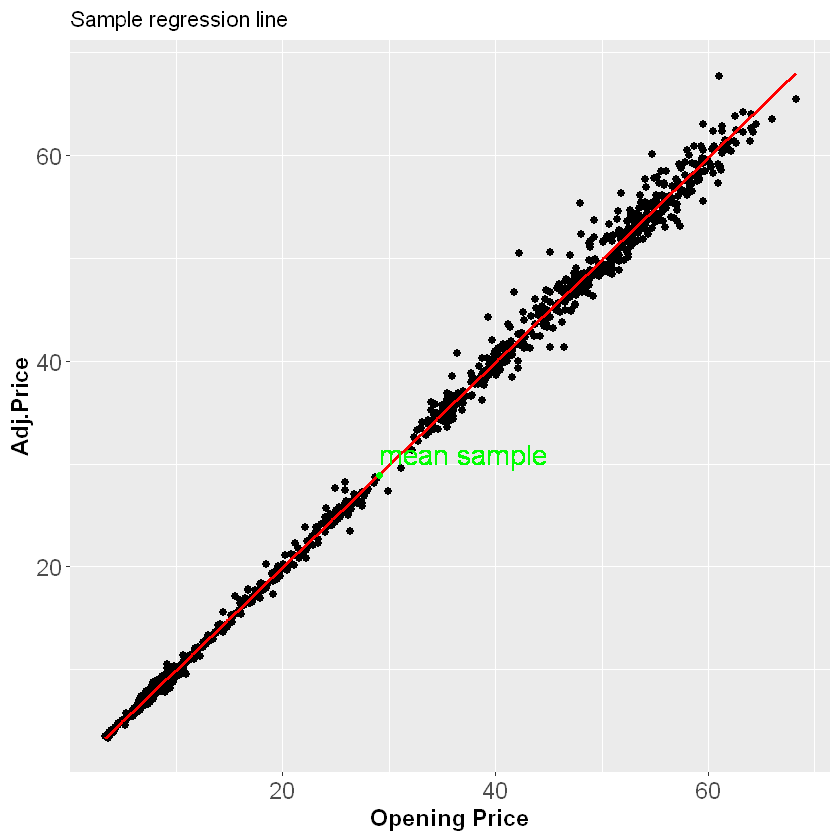

In [20]:
# Opening Price vs Adjusted Price
ggplot(data = newData, aes(x = Open, y = Adj.Close)) +
   geom_point(size = 2, color = 'black') +
   geom_smooth(method = lm, formula = y ~ x , color = 'red', se = FALSE) +
   geom_point(aes(x = mean(Open), y = mean(Adj.Close)), size = 1.5, color = 'green') +
   geom_text(aes(x = mean(Open), y = mean(Adj.Close)), label = 'mean sample', hjust = 0, vjust = -0.5, size = 6, color = 'green') +
   labs(x = 'Opening Price', y = 'Adj.Price') + 
   ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

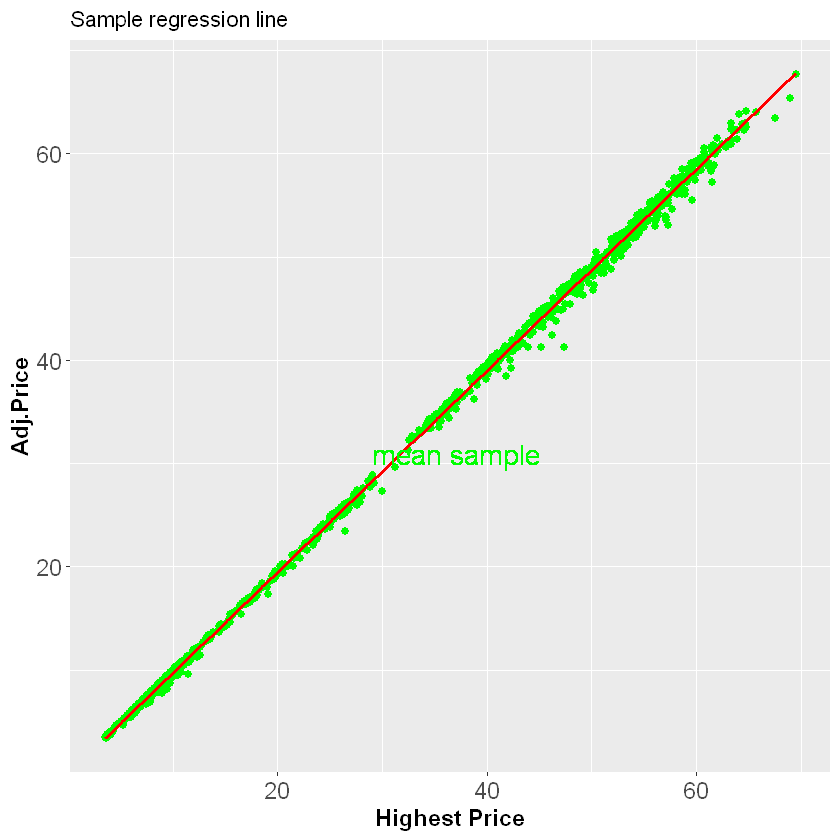

In [21]:
# Highest Price vs Adjusted Price
ggplot(data = newData, aes(x = High, y = Adj.Close)) +
   geom_point(size = 2, color = 'green') +
   geom_smooth(method = lm, formula = y ~ x , color = 'red', se = FALSE) +
   geom_point(aes(x = mean(Open), y = mean(Adj.Close)), size = 1.5, color = 'green') +
   geom_text(aes(x = mean(Open), y = mean(Adj.Close)), label = 'mean sample', hjust = 0, vjust = -0.5, size = 6, color = 'green') +
   labs(x = 'Highest Price', y = 'Adj.Price') + 
   ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

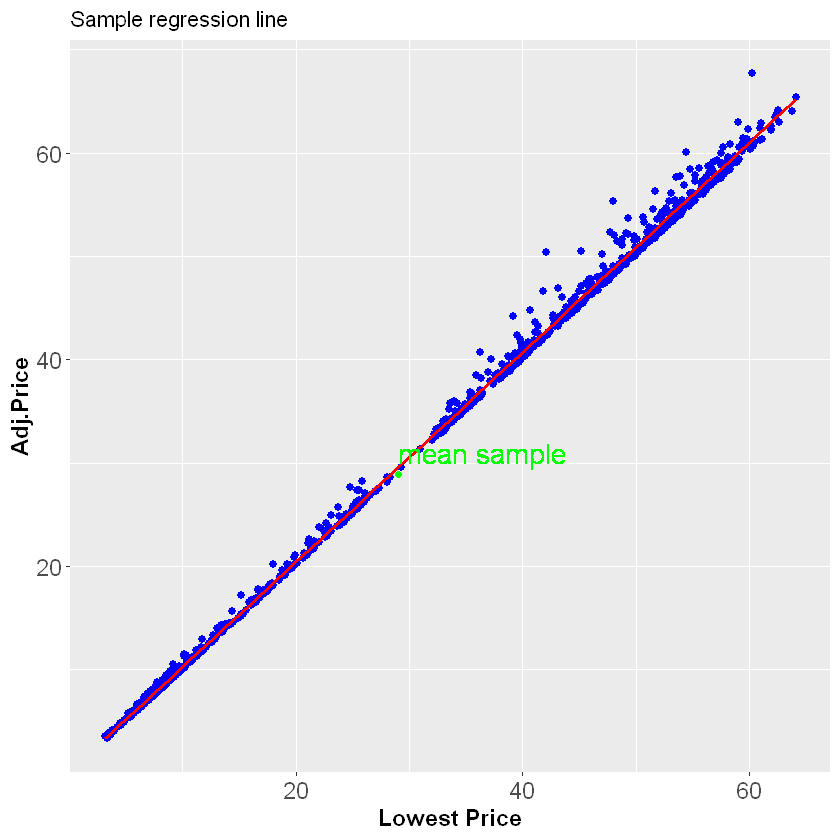

In [22]:
# Lowest Price vs Adjusted Price
ggplot(data = newData, aes(x = Low, y = Adj.Close)) +
   geom_point(size = 2, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x , color = 'red', se = FALSE) +
   geom_point(aes(x = mean(Open), y = mean(Adj.Close)), size = 1.5, color = 'green') +
   geom_text(aes(x = mean(Open), y = mean(Adj.Close)), label = 'mean sample', hjust = 0, vjust = -0.5, size = 6, color = 'green') +
   labs(x = 'Lowest Price', y = 'Adj.Price') + 
   ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

In [23]:
predictors = newData[, 1:3]
head(predictors)
str(predictors)

,Open,High,Low
,<dbl>,<dbl>,<dbl>
1,40.00270,40.30049,39.35749
2,40.15159,40.99532,39.70491
3,40.05233,40.35012,39.80418
4,40.00270,42.28573,39.90344
5,40.89606,41.19385,39.55602
6,39.90344,40.35012,39.65528


'data.frame':	1232 obs. of  3 variables:
 $ Open: num  40 40.2 40.1 40 40.9 ...
 $ High: num  40.3 41 40.4 42.3 41.2 ...
 $ Low : num  39.4 39.7 39.8 39.9 39.6 ...


In [24]:
response = newData[, 4]
head(response)
str(response)

[1] 39.80418 40.39975 39.90344 40.89606 39.90344 39.85381

 num [1:1232] 39.8 40.4 39.9 40.9 39.9 ...


In [25]:
print(model$fitted)

        1         2         3         4         5         6         7         8 
39.489045 40.232851 39.804296 41.539503 39.908389 39.783140 38.918205 39.972913 
        9        10        11        12        13        14        15        16 
38.119245 38.317005 37.582764 36.632149 37.020236 36.207205 36.954066 35.726747 
       17        18        19        20        21        22        23        24 
36.025351 38.146643 37.986751 39.183517 38.145423 38.196618 38.586696 37.770026 
       25        26        27        28        29        30        31        32 
38.556139 40.174243 39.511101 38.695687 39.999795 36.941412 38.067889 37.740019 
       33        34        35        36        37        38        39        40 
38.818038 39.072017 43.704815 42.140770 41.278188 40.352881 39.675954 41.194631 
       41        42        43        44        45        46        47        48 
40.540148 39.952148 40.052284 39.229111 43.267625 42.414826 38.539261 40.175729 
       49        50        5

In [26]:
# Creating new cols of Predicted Price and Residuals 
newData$Price_Predicted = predict(model)
newData$residuals = residuals(model)

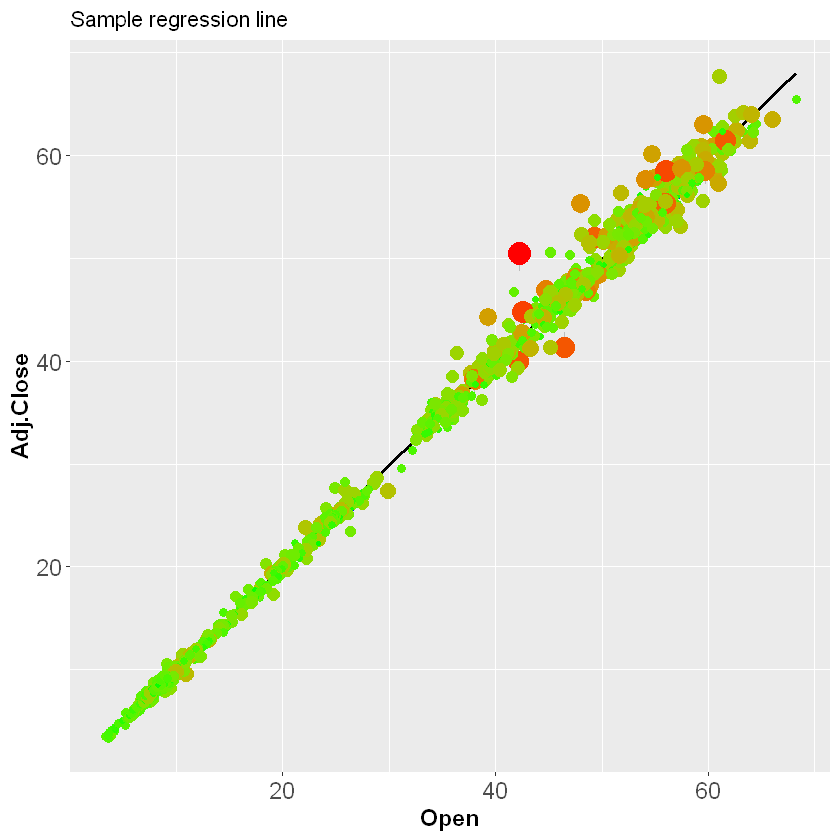

In [27]:
# Plotting Residual Graph
ggplot(data = newData, aes(x = Open, y = Adj.Close)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, se = FALSE, color = 'black') +
   geom_segment(aes(xend = Open, yend = Price_Predicted), alpha = 0.2) + 
   geom_point(aes(color = abs(residuals), size = abs(residuals))) +
   scale_color_continuous(low = "green", high = "red") + 
   guides(color = FALSE, size = FALSE) + 
   labs(x = 'Open', y = 'Adj.Close') + 
   ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

We can see the actual Opening price and Predicted price with very less residual errors, there few data points with near the opening price of 40-60 Rupees with some residuals.

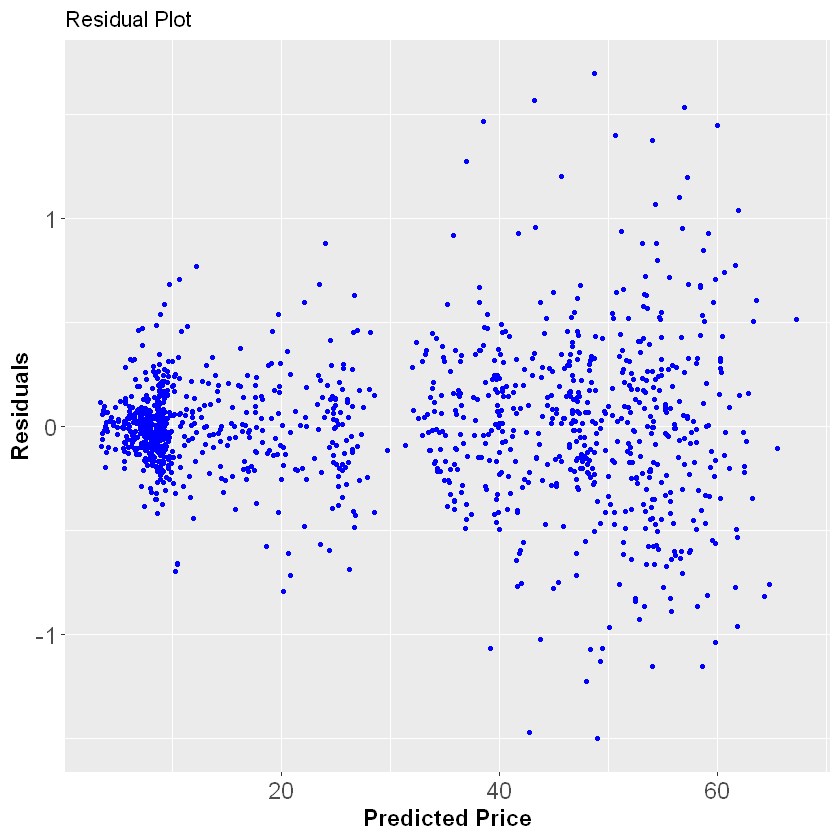

In [28]:
# Residual Plot: Predicted Price vs Residuals Observed
ggplot(data = newData, aes(x = Price_Predicted, y = residuals)) +
   geom_point(size = 1, color = 'blue') +
   labs(x = 'Predicted Price', y = 'Residuals') + 
   ggtitle("Residual Plot") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

From the graph we can see that the data points are randomly dispersed around the horizontal axis, this implies our Regression model is appropriate for the data.

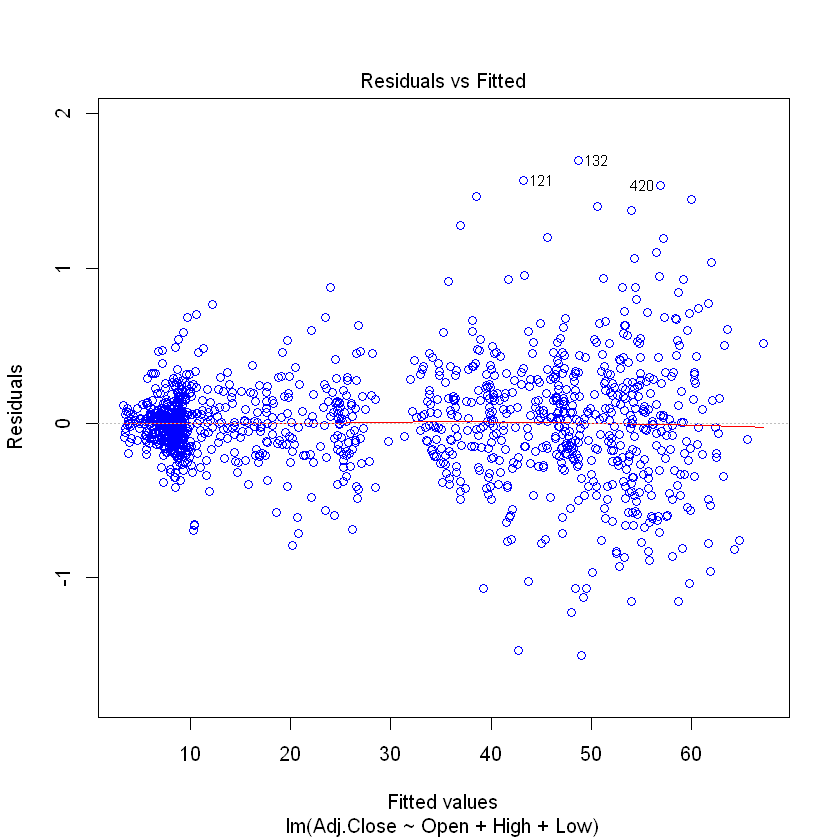

In [29]:
plot(model, which = 1, col = c("blue")) 
# which = 1 --> Residual Plot

Residual Plot is used to check the relationship between the Response and the Predictor. So we see a distinct pattern here which implies a non linear relationship and we can say our Linear Regression Model fits the data and the residuals capture what the linear model is missing( Non Linearity, Noise )

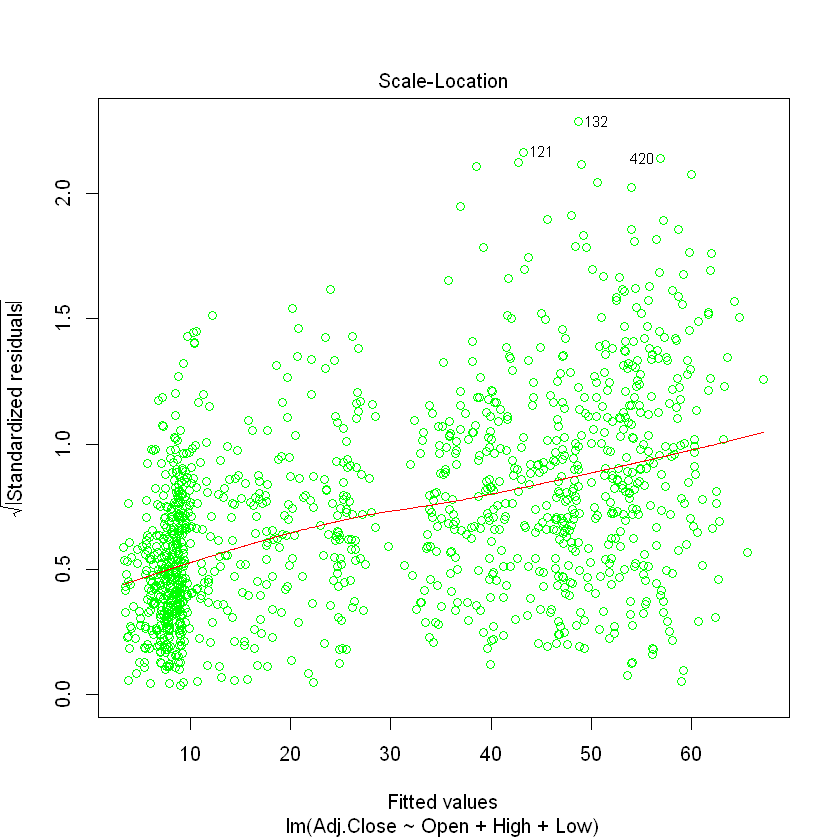

In [30]:
plot(model, which = 3, col = c("green")) 
#  which = 2 --> # Scale-Location Plot
# gives sqroot of stdanrdized residual

The Scale_Location plot is used to check if the residuals have a constant vStandard Deviation (Homoscedasticity), constant variance is seen here as the plot is more or less horizontal. We see our red line fairly horizontal satisfying the assumption of homoscedasticity.

### Predicting the next day price

In [34]:
PrData = data.frame(Open = c(9.75), High = c(9.80), Low = c(9.20))
Pr_Price = predict(model, PrData)
sprintf("The Predicted Price of HCL-InfoSystems for 20th May is Rs - ")
sprintf(Pr_Price, fmt = '%#.2f')

[1] "The Predicted Price of HCL-InfoSystems for 20th May is Rs - "

[1] "9.37"

In [32]:
sum((9.40-9.37), (9.40-9.33), (9.40-9.40))

[1] 0.1